# Linear Regression, Lasso Regression, Ridge Regression

### Дабеска Мила 193263

&nbsp;

## Import the required libraries

In [28]:
import matplotlib.pyplot as plt #Libraries for visualization
import seaborn as sns
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler #Min max Scaler for normalization of data to range [0,1]
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge #Importing the linear regression models
from sklearn.metrics import mean_squared_error #For evaluation of the models
import pandas as pd
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

&nbsp;

## Load the California Housing Dataset

In [2]:
column_names = np.loadtxt(open("california_housing_train.csv", "rb"), delimiter=",", max_rows=1, dtype = str) 
data = np.loadtxt(open("california_housing_train.csv", "rb"), delimiter=",", skiprows=1, dtype = str)

dataset=pd.read_csv('california_housing_train.csv')
dataset

longitude,"latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.31 34.19 15.0 5612.0 1283.0 1015.0 472.0 1.4936                                            66900.0                                                                                      
-114.47 34.40 19.0 7650.0 1901.0 1129.0 463.0 1.8200                                            80100.0                                                                                      
-114.56 33.69 17.0 720.0  174.0  333.0  117.0 1.6509                                            85700.0                                                                                      
-114.57 33.64 14.0 1501.0 337.0  515.0  226.0 3.1917                                            73400.0                                                                                      
        33.57 20.0 1454.0 326.0  624.0  262.0 1.9250                                            65500.0                                                                                      
...                                                                                                 ...                                                                                      
-124.26 40.58 52.0 2217.0 394.0  907.0  369.0 2.3571                                           111400.0                                                                                      
-124.27 40.69 36.0 2349.0 528.0  1194.0 465.0 2.5179                                            79000.0                                                                                      
-124.30 41.84 17.0 2677.0 531.0  1244.0 456.0 3.0313                                           103600.0                                                                                      
        41.80 19.0 2672.0 552.0  1298.0 478.0 1.9797                                            85800.0                                                                                      
-124.35 40.54 52.0 1820.0 300.0  806.0  270.0 3.0147                                            94600.0                                                                                      

[17000 rows x 1 columns]

In [15]:
data = data.astype(np.float)

X = data[:,1:].astype(np.float) 
y = data[:,0].astype(np.float)
N = X.shape[0]

number_of_features = X.shape[1]
feature_names = column_names[1:]
feature_names = [feature_name.replace('\"', '') for feature_name in feature_names]

print(X.shape)
print(f'\n{y.shape}')
print(f'\n{feature_names} ')

(17000, 8)

(17000,)

['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'] 


In [4]:
print(f'Input vectors: {X}')
print(f'\nLast column: {y}')

Input vectors: [[3.4190e+01 1.5000e+01 5.6120e+03 ... 4.7200e+02 1.4936e+00 6.6900e+04]
 [3.4400e+01 1.9000e+01 7.6500e+03 ... 4.6300e+02 1.8200e+00 8.0100e+04]
 [3.3690e+01 1.7000e+01 7.2000e+02 ... 1.1700e+02 1.6509e+00 8.5700e+04]
 ...
 [4.1840e+01 1.7000e+01 2.6770e+03 ... 4.5600e+02 3.0313e+00 1.0360e+05]
 [4.1800e+01 1.9000e+01 2.6720e+03 ... 4.7800e+02 1.9797e+00 8.5800e+04]
 [4.0540e+01 5.2000e+01 1.8200e+03 ... 2.7000e+02 3.0147e+00 9.4600e+04]]

Last column: [-114.31 -114.47 -114.56 ... -124.3  -124.3  -124.35]


&nbsp;

## Visualizations

### Feature and Target Variable Histograms

<IPython.core.display.Javascript object>


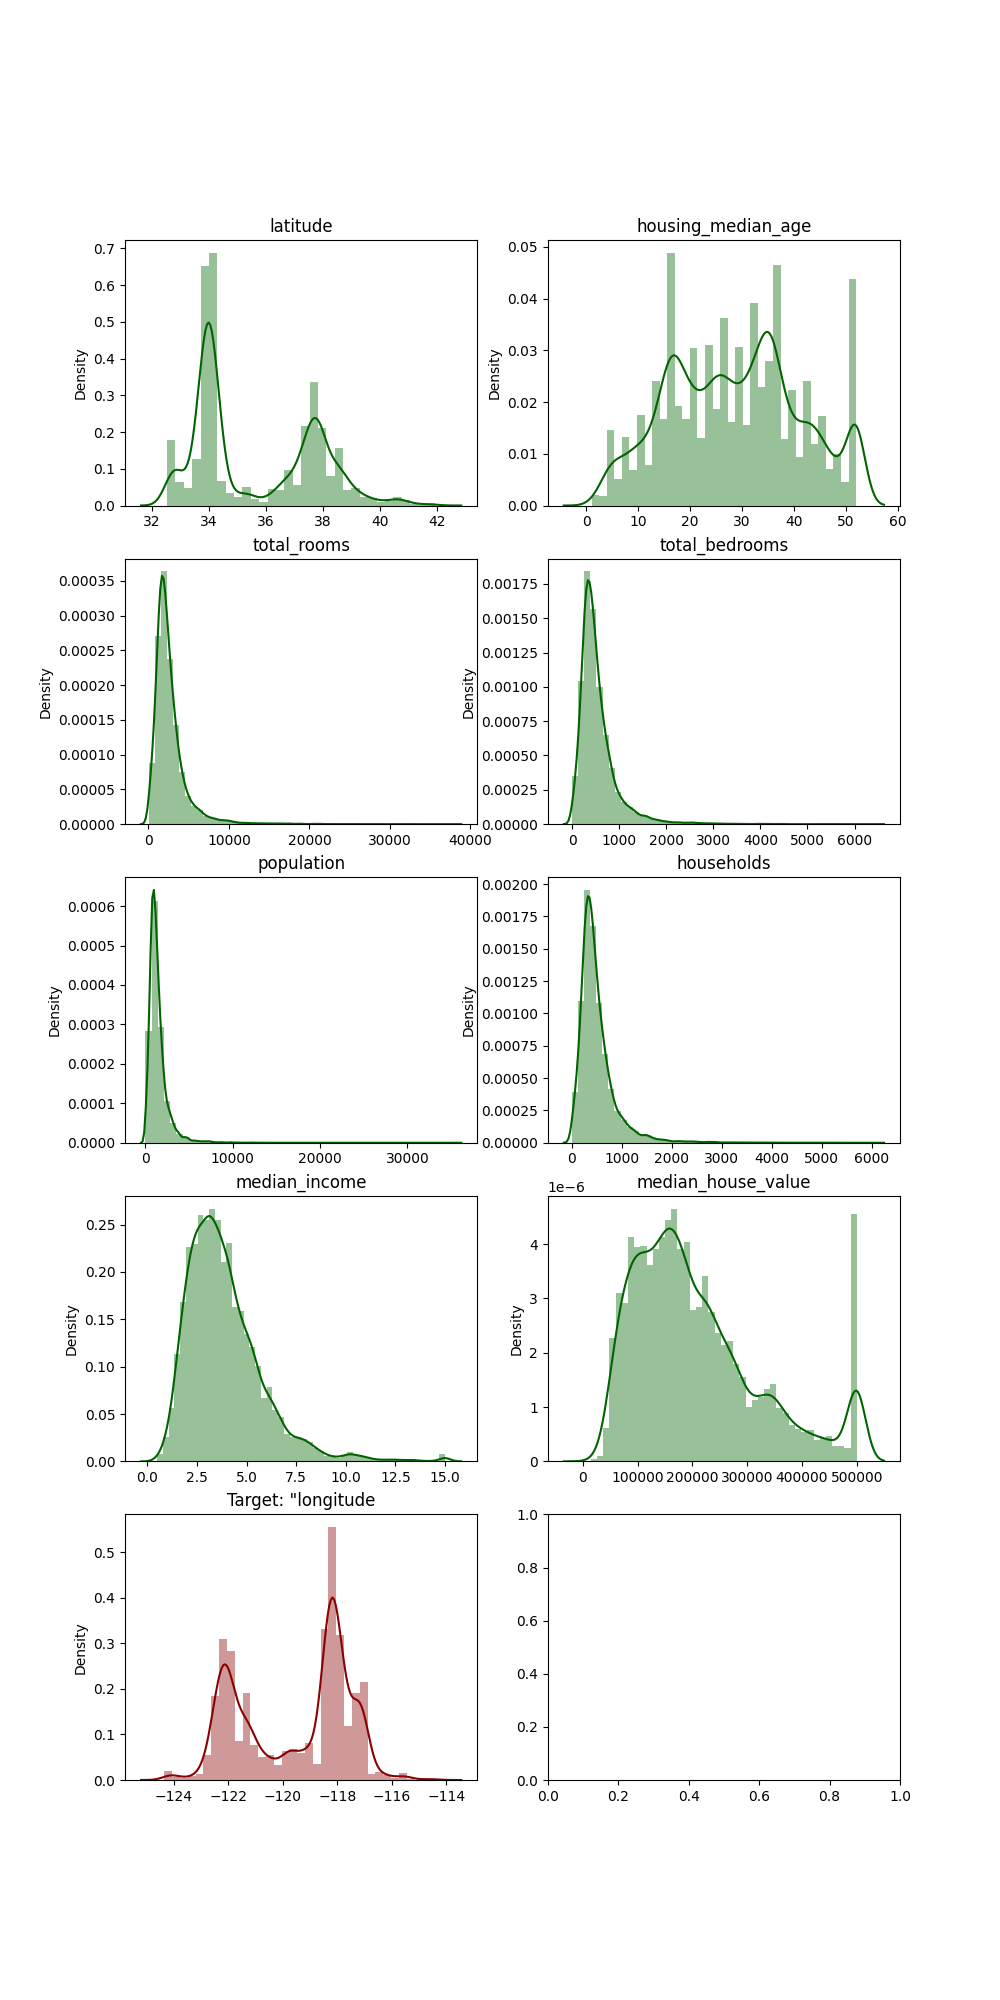

In [63]:
fig = plt.figure(figsize=(10, 20))
fig.subplots(number_of_features//2+1, ncols=2)
for feat_i in range(number_of_features): 
    ax = plt.subplot(number_of_features//2+1,2, feat_i+1)
    plt.title(feature_names[feat_i]) 
    sns.distplot(X[:,feat_i], color = "darkgreen") 
ax = plt.subplot(number_of_features//2+1,2, feat_i+2)
plt.title("Target: " + column_names[0]) 
sns.distplot(y, color = "darkred") 
plt.show()

### Feature with feature scatterplots

<IPython.core.display.Javascript object>


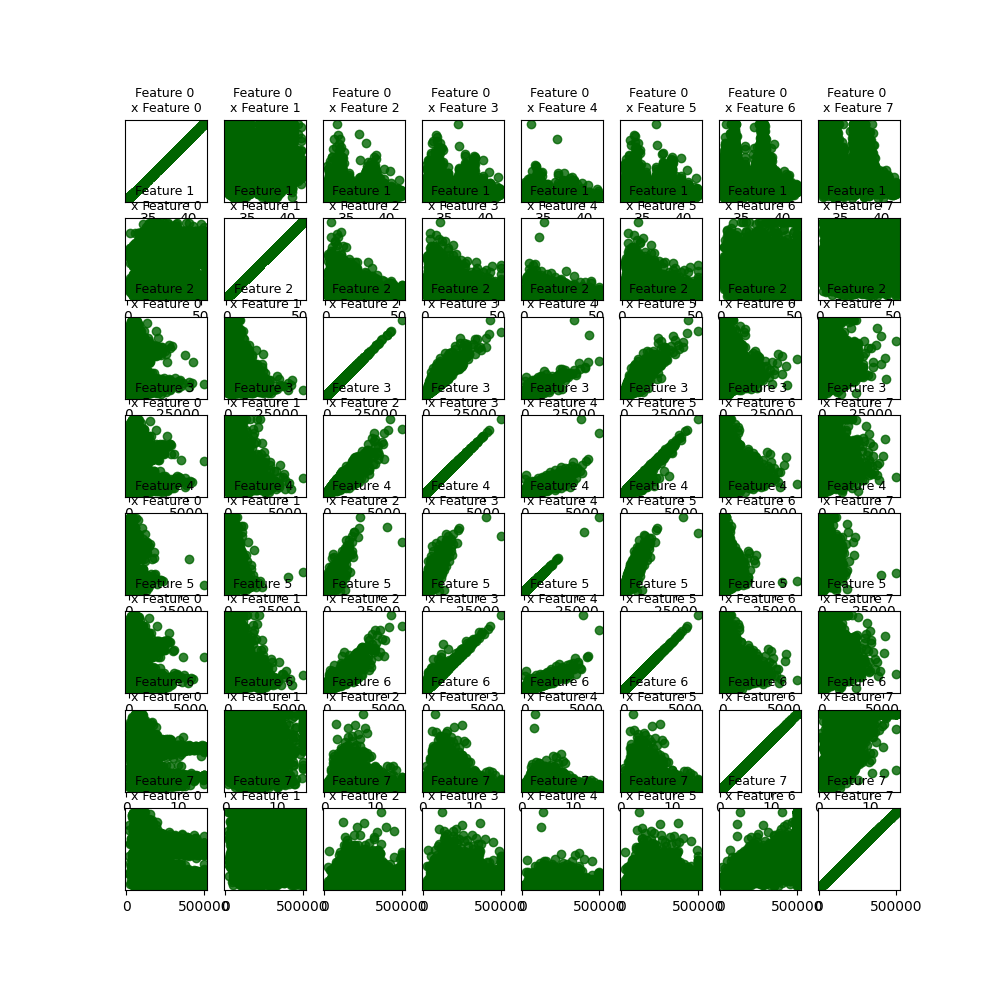

In [12]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=number_of_features, ncols=number_of_features)
for feat_i in range(number_of_features): 
    for feat_j in range(number_of_features): 
        ax = plt.subplot(number_of_features,number_of_features,number_of_features*feat_i + feat_j+1)
        plt.scatter(X[:,feat_i], X[:, feat_j], alpha=.8, color="darkgreen") 
        plt.yticks(())
        plt.title("Feature "+str(feat_i)+" \nx Feature "+str(feat_j), fontsize=9)
plt.show()

### Feature with Target scatterplots

<IPython.core.display.Javascript object>


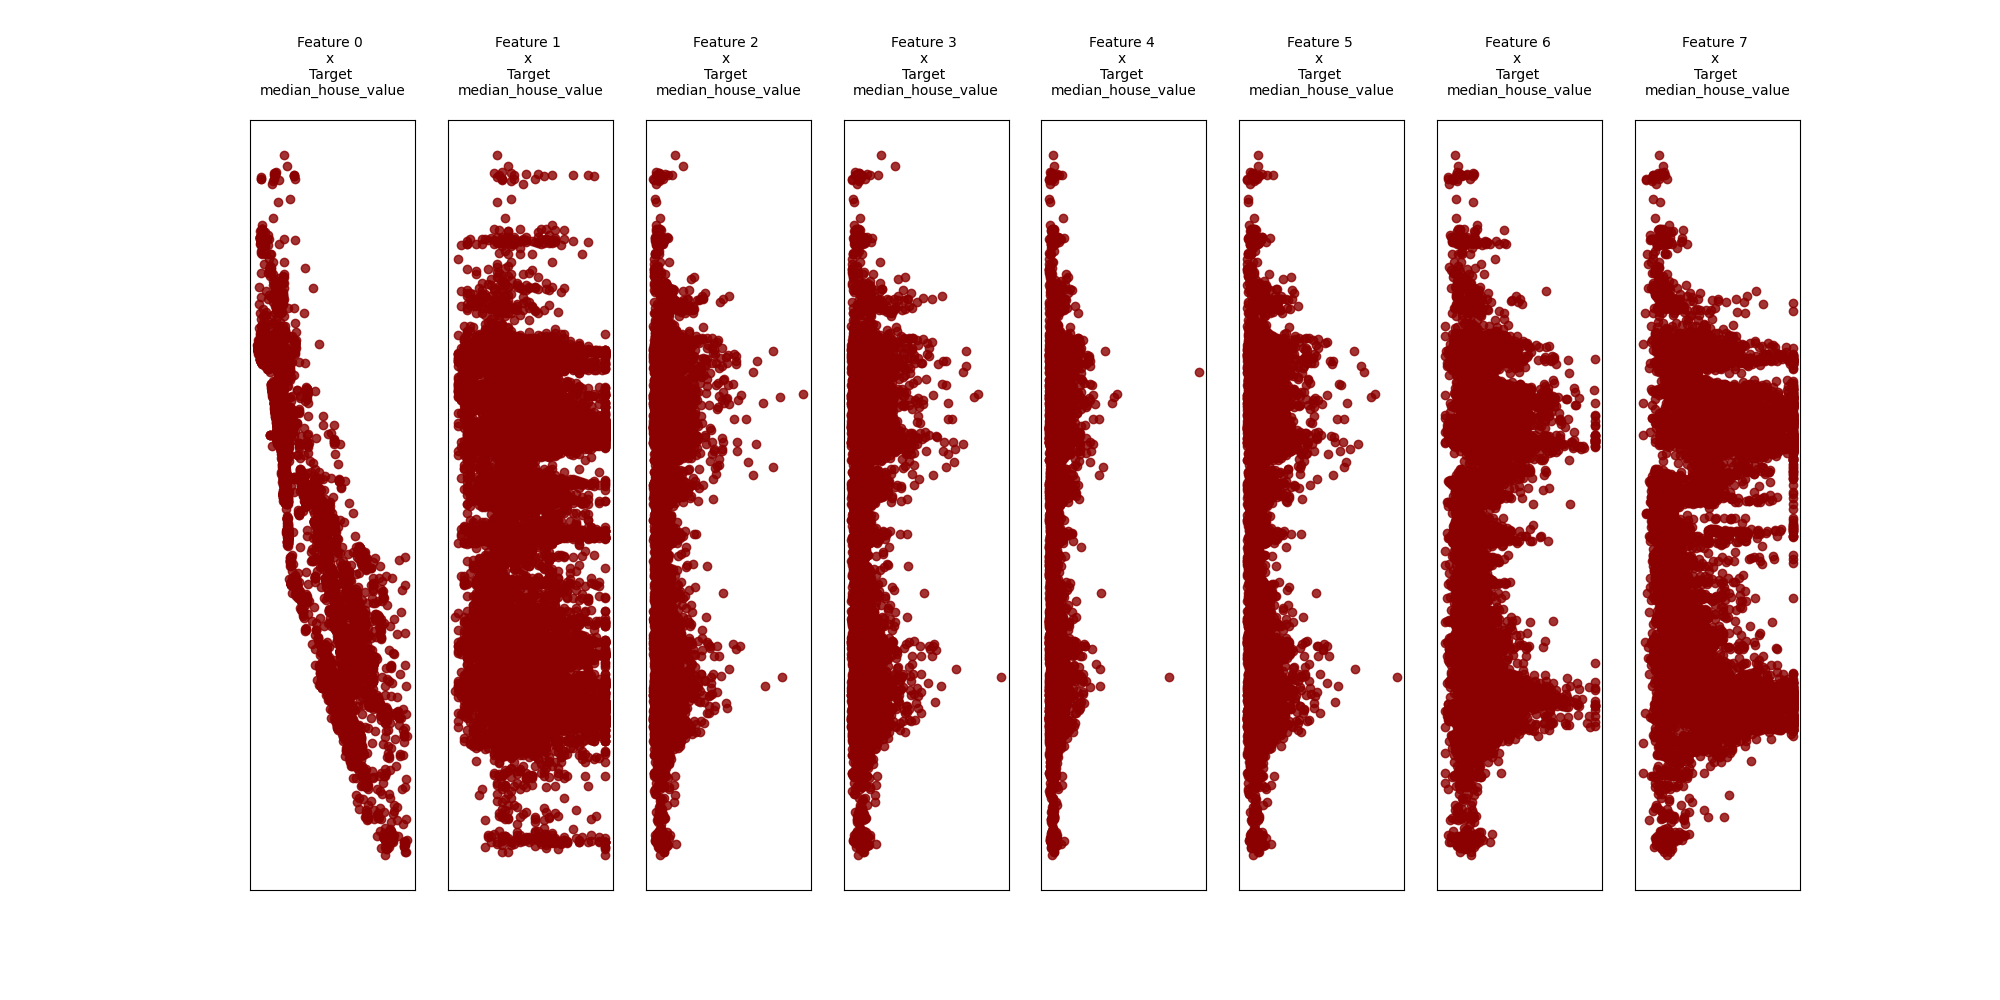

In [10]:
fig = plt.figure(figsize=(20, 10))
fig.subplots(ncols=number_of_features)
for feat_i in range(number_of_features): 
    ax = plt.subplot(1 ,number_of_features, feat_i+1)
    plt.scatter( X[:,feat_i], y,  alpha=.8, color="darkred") 
    plt.xticks(())
    plt.yticks(())
    plt.title(f"Feature {str(feat_i)} \nx \nTarget \n{feature_names[-1]}\n", fontsize=10)
plt.show()

### Feature with Target KDE joint plots

<IPython.core.display.Javascript object>


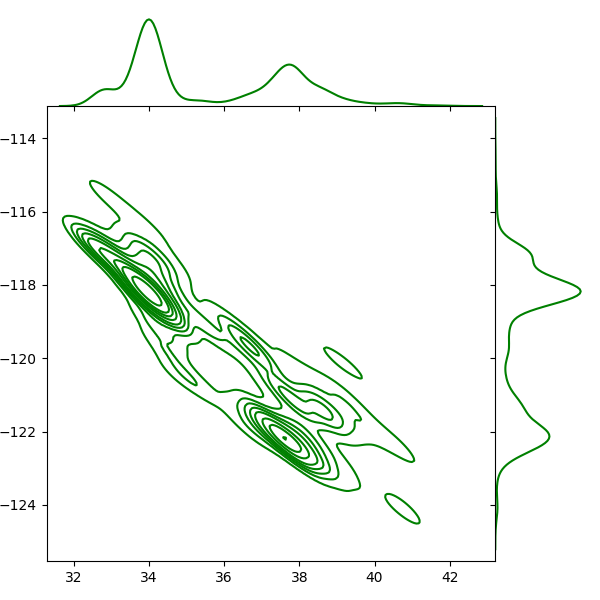

<IPython.core.display.Javascript object>


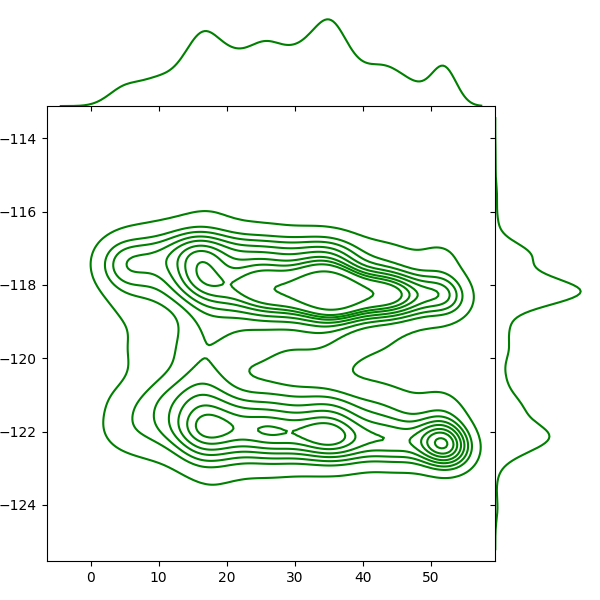

<IPython.core.display.Javascript object>


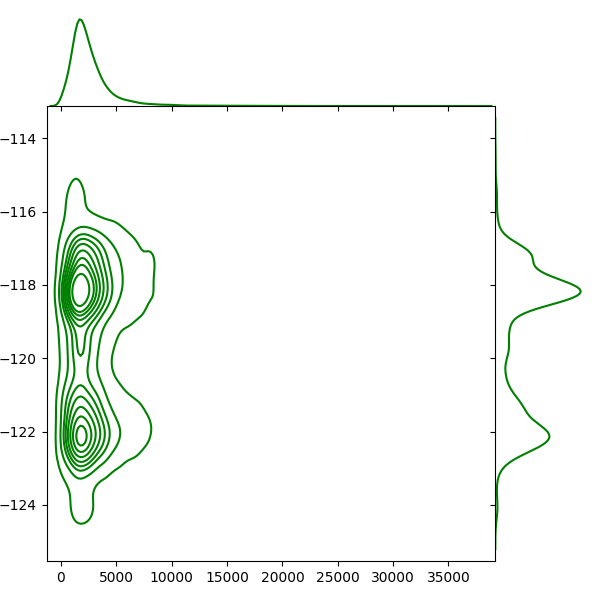

<IPython.core.display.Javascript object>


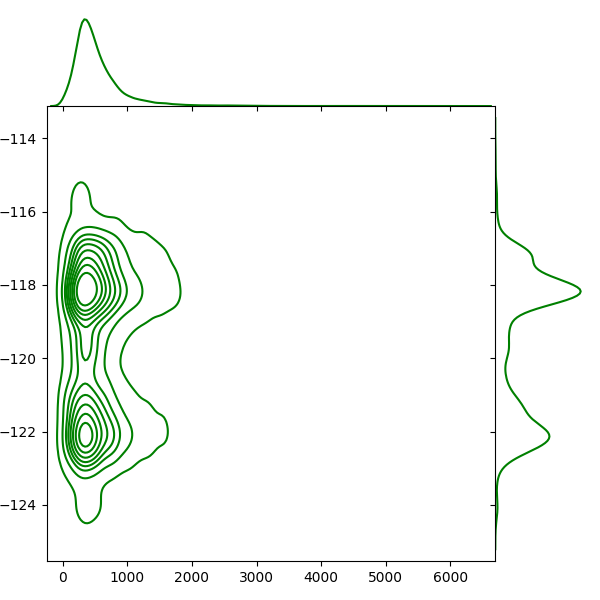

<IPython.core.display.Javascript object>


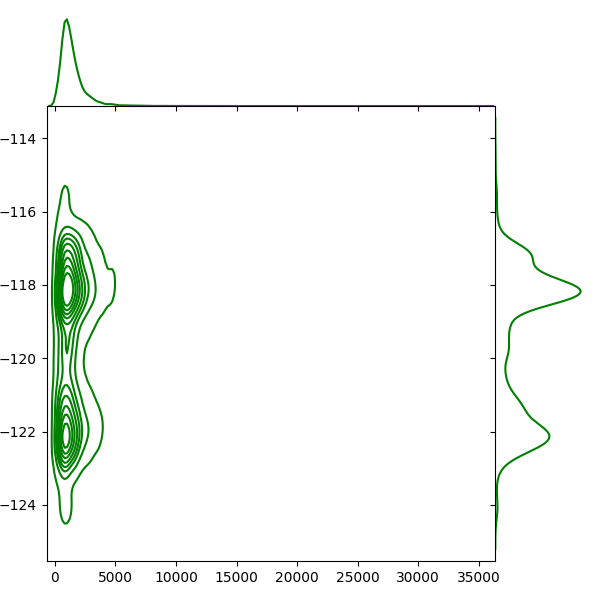

<IPython.core.display.Javascript object>


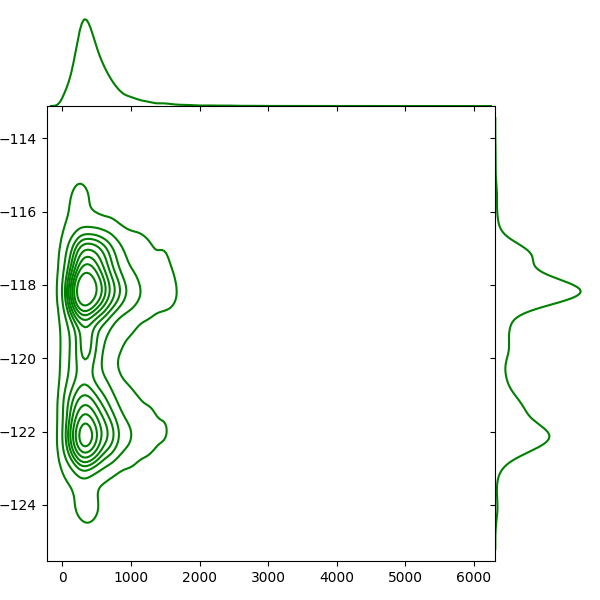

<IPython.core.display.Javascript object>


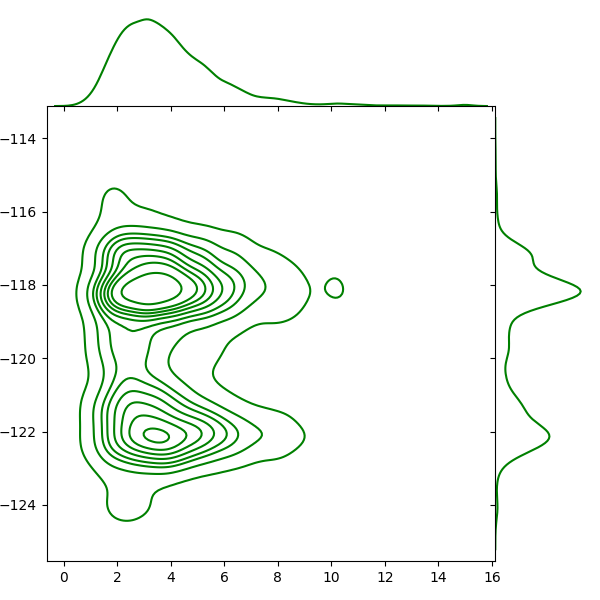

<IPython.core.display.Javascript object>


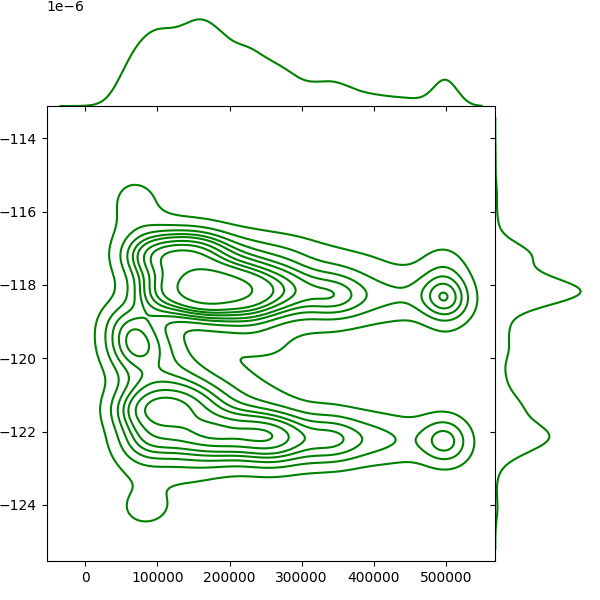

In [87]:
for feat_i in range(number_of_features):
    sns.jointplot(x=X[:,feat_i], y=y, kind="kde", space=0, color="g")
plt.show()

### Between feature dependence - correlation

<IPython.core.display.Javascript object>


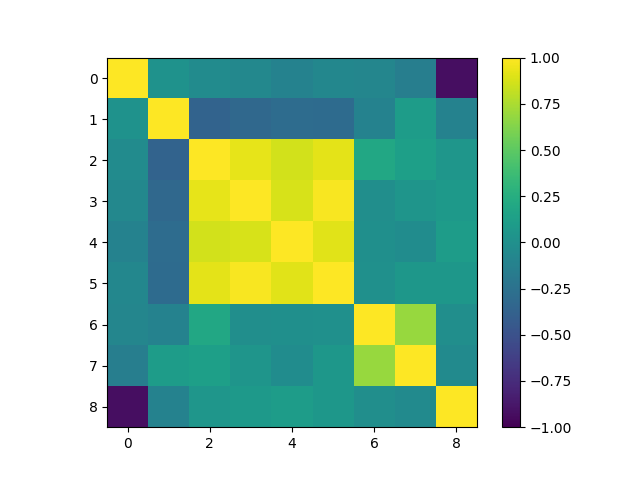

In [88]:
correlation_matrix = np.ones((number_of_features +1 ,number_of_features +1))
for i in range(number_of_features): 
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
for i in range(number_of_features): 
    j = number_of_features
    measure = X[:,i]
    measure2 = y
    corr, _ = stats.pearsonr(measure, measure2)
    correlation_matrix[i][j] = corr
    correlation_matrix[j][i] = corr
plt.figure()
plt.imshow(correlation_matrix, cmap = "viridis", vmin=-1, vmax=1) 
plt.colorbar()
plt.show()

&nbsp;

## Data preprocessing - Min Max Normalization of the data

In [20]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

&nbsp;

## Regression
Проучување на линеарните (праволиниските) врски помеѓу променливите (влезните променливи (x) и излезните променливи (y)).

In [21]:
reg = LinearRegression().fit(X_train, y_train)
print(f"Coefficients W: {reg.coef_}")
print(f"\nIntercept W0: {reg.intercept_ }")
y_pred = reg.predict(X_test)
print(f"\nError: {mean_squared_error(y_test, y_pred)}")

Coefficients W: [-8.50048561 -0.52261183  5.60130625  5.85401195 -4.23914417 -9.29473371
  0.15994017 -1.67273297]

Intercept W0: -115.8150777986813

Error: 0.38814405650167094


### Regression using the Ridge Regression model
Метод за проценка на коефициентите на моделите каде линеарно независните променливи се во голема корелација.

Coefficients W: [-8.46794094 -0.55147262  4.52406869  2.71136117 -3.80763795 -5.32025508
  0.21087    -1.67219442]

Intercept W0: -115.82867542960942

Error: 0.3933684735128788


<IPython.core.display.Javascript object>


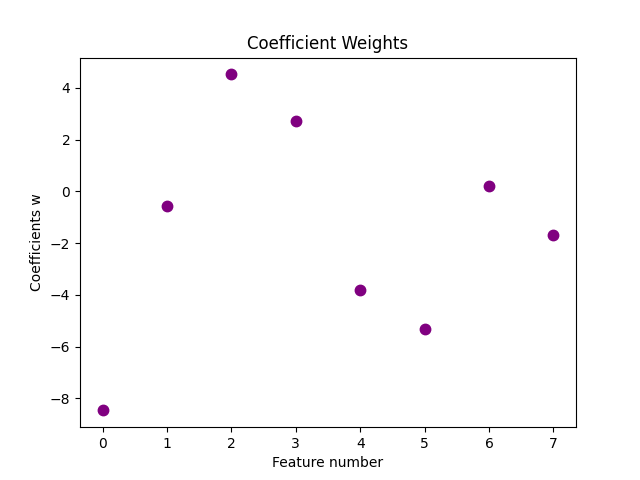

In [32]:
reg = Ridge(alpha=1).fit(X_train, y_train)
print(f"Coefficients W: {reg.coef_}")
print(f"\nIntercept W0: {reg.intercept_ }")
y_pred = reg.predict(X_test)
print(f"\nError: {mean_squared_error(y_test, y_pred)}")

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "purple")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

### Regression using the Lasso Regression model
Метод за анализа во која променливите се избираат и регулираат во исто време. Овој метод користи казна која влијае на вредноста на регресивните коефициенти.

Coefficients W: [-6.23489944 -0.          0.          0.          0.          0.
 -0.         -0.        ]

Intercept W0: -117.52020113700898

Error: 0.7748350383373219


<IPython.core.display.Javascript object>


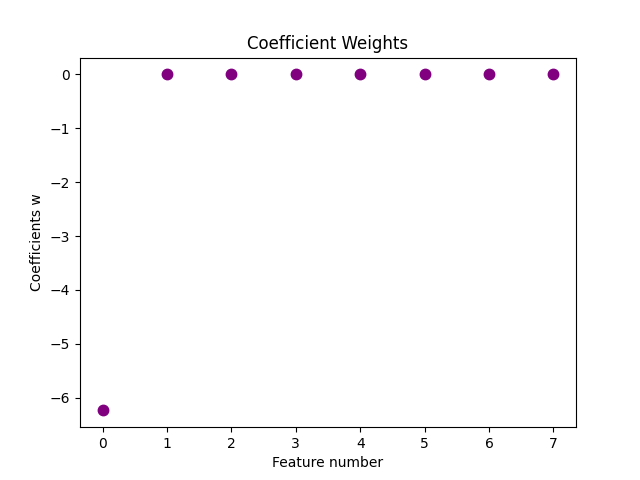

In [31]:
reg = Lasso(alpha = 0.1).fit(X_train, y_train)
print(f"Coefficients W: {reg.coef_}")
print(f"\nIntercept W0: {reg.intercept_ }")
y_pred = reg.predict(X_test)
print(f"\nError: {mean_squared_error(y_test, y_pred)}")

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "purple")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

### Regression using the ElasticNet Regression model
Метод на регресија кој линеарно ги комбинира казните L1 и L2 на методите Lasso и Ridge.
- L1 -> збир на апсолутните вредности на тежините
- L2 -> збир на квадратите на тежините

Coefficients W: [-3.22763607 -0.16138404  0.          0.          0.          0.
 -0.         -0.12247776]

Intercept W0: -118.37229540449658

Error: 1.8097576758776281


<IPython.core.display.Javascript object>


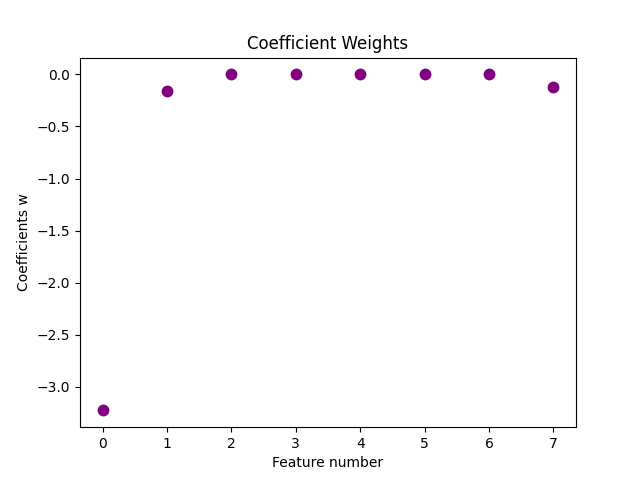

In [30]:
reg = ElasticNet(alpha = 0.1, l1_ratio = 0.3).fit(X_train, y_train)
print(f"Coefficients W: {reg.coef_}")
print(f"\nIntercept W0: {reg.intercept_ }")
y_pred = reg.predict(X_test)
print(f"\nError: {mean_squared_error(y_test, y_pred)}")

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "purple")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()

### Regression using the Bayesian Ridge Regression model
Се презема во контекст на Баесовото заклучување.

Coefficients W: [-8.50018851 -0.52320321  5.59255659  5.76488788 -4.24933513 -9.19028985
  0.15974661 -1.67286781]

Intercept W0: -115.81487753209939

Error: 0.3882052445290196


<IPython.core.display.Javascript object>


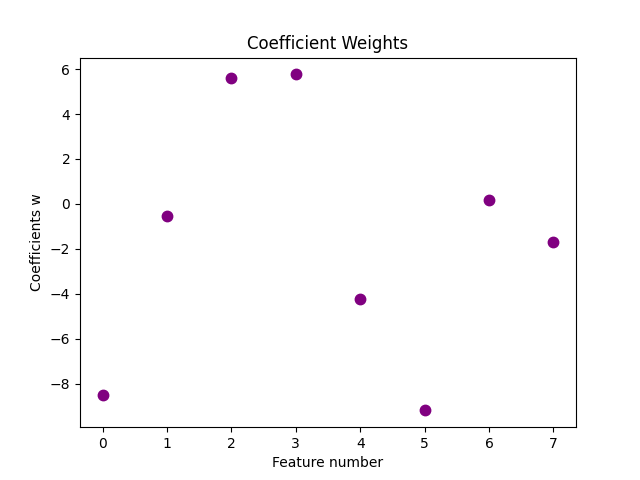

In [29]:
reg = BayesianRidge().fit(X_train, y_train)
print(f"Coefficients W: {reg.coef_}")
print(f"\nIntercept W0: {reg.intercept_ }")
y_pred = reg.predict(X_test)
print(f"\nError: {mean_squared_error(y_test, y_pred)}")

plt.figure()
plt.plot(np.arange(len(reg.coef_)), reg.coef_, ".",  markersize=15, color = "purple")
plt.xlabel("Feature number")
plt.ylabel("Coefficients w")
plt.title("Coefficient Weights")
plt.show()